In [ ]:
import sys
sys.path.append('..')

import warnings
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from midterm.module.utils import *
from datetime import datetime

warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_excel("../data/spx_returns_weekly.xlsx", sheet_name = "s&p500 rets").set_index("date")
spy = pd.read_excel("../data/spx_returns_weekly.xlsx", sheet_name = "benchmark rets").set_index("date")["SPY"]
data.head()

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,0.000740,0.024514,0.006681,0.010599,0.010581,-0.006912,-0.014763,-0.061514,0.015247,-0.021166,...,-0.007094,0.004489,0.011354,0.014705,0.001663,-0.007864,-0.071168,0.015343,0.049916,0.040165
2015-01-16,-0.057649,-0.053745,-0.010497,0.002370,-0.009913,-0.001531,-0.018825,-0.023352,0.000118,-0.024369,...,0.003522,-0.018548,0.003013,-0.013821,0.023218,-0.010640,-0.025443,-0.008421,-0.010236,0.029426
2015-01-23,0.014640,0.065950,-0.014160,0.002700,0.003713,0.032483,0.015274,0.003985,0.026960,0.023571,...,-0.022367,-0.015711,-0.016109,-0.006668,0.019987,-0.002524,0.020307,0.023193,-0.000171,0.015438
2015-01-30,-0.026799,0.036997,0.020519,-0.024242,-0.058171,-0.053065,-0.044119,-0.025903,-0.049741,-0.071920,...,-0.027416,0.001620,-0.005269,0.013287,-0.006089,-0.038178,-0.030427,-0.024691,-0.041716,-0.008671
2015-02-06,0.041567,0.019114,0.016533,0.035190,0.049030,0.034365,0.055656,0.019943,0.047376,0.056754,...,0.033666,0.036721,-0.027340,-0.011558,-0.048496,0.054550,0.031968,0.022828,0.036128,0.044213


In [10]:
correlation = list()
for ticker in data.columns:
    corr = data[ticker].corr(spy)
    correlation.append(corr)

In [12]:
mean, std, sharpe = Calc_MeanStdSharpe_Stock(data, 52)
skew, kurt = Calc_SkewKurt(data)
var = Calc_Var(data)
maxDrawdown, drawdown = Calc_MaxDrawdown(data)
summary = pd.DataFrame({
    "Volatility": std,
    "Skew": skew,
    "5th quantile": var,
    "Max Drawdown": maxDrawdown,
    "Correlation with SPY": correlation,
    "Mean Return": mean
})
summary

,Volatility,Skew,5th quantile,Max Drawdown,Correlation with SPY,Mean Return
A,0.250038,-0.243987,-0.057619,-0.418293,0.689739,0.133999
AAPL,0.276629,-0.218583,-0.056366,-0.346408,0.687651,0.238714
ABT,0.230793,-0.256114,-0.052373,-0.330374,0.573112,0.149043
ACGL,0.281508,0.503618,-0.050282,-0.518036,0.569312,0.193272
ACN,0.238196,-0.212839,-0.054341,-0.386209,0.730578,0.165116
...,...,...,...,...,...,...
XOM,0.273887,-0.068860,-0.054584,-0.597570,0.518788,0.091180
XYL,0.265907,-0.399871,-0.060031,-0.463902,0.721963,0.161555
YUM,0.239797,-0.003879,-0.041368,-0.508504,0.639428,0.146330
ZBH,0.270596,-0.247815,-0.057361,-0.463965,0.614530,0.028992


In [19]:
negative_skew = 0
positive_skew = 0
negative_kurt = 0
positive_kurt = 0
for s in skew:
    if s < 0:
        negative_skew += 1
    if s >= 0:
        positive_skew += 1
for k in kurt:
    if k < 0:
        negative_kurt += 1
    if k >= 0:
        positive_kurt += 1
print(f"Number of assets with negative skew: {negative_skew}")
print(f"Number of assets with positive skew: {positive_skew}")
print(f"Average skewness: {np.median(skew)}")
print(f"Number of assets with negative kurtosis: {negative_kurt}")
print(f"Number of assets with positive kurtosis: {positive_kurt}")
print(f"Average kurtosis: {np.median(kurt)}")

Number of assets with negative skew: 227
Number of assets with positive skew: 215
Average skewness: -0.01124498727341237
Number of assets with negative kurtosis: 0
Number of assets with positive kurtosis: 442
Average kurtosis: 4.361929000402331


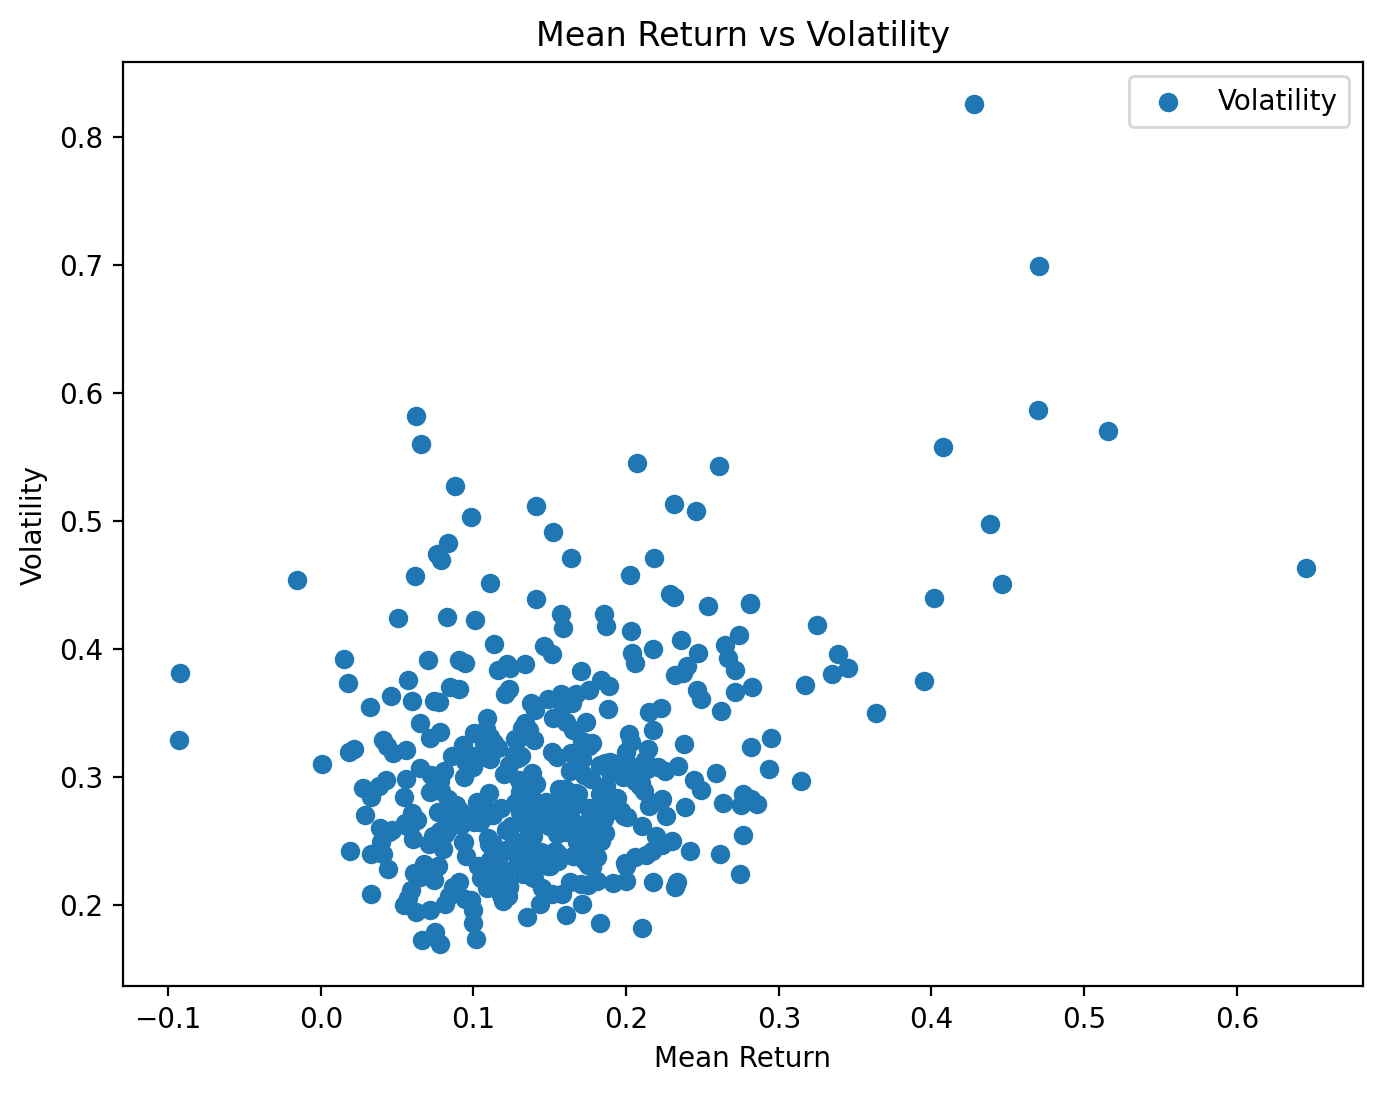

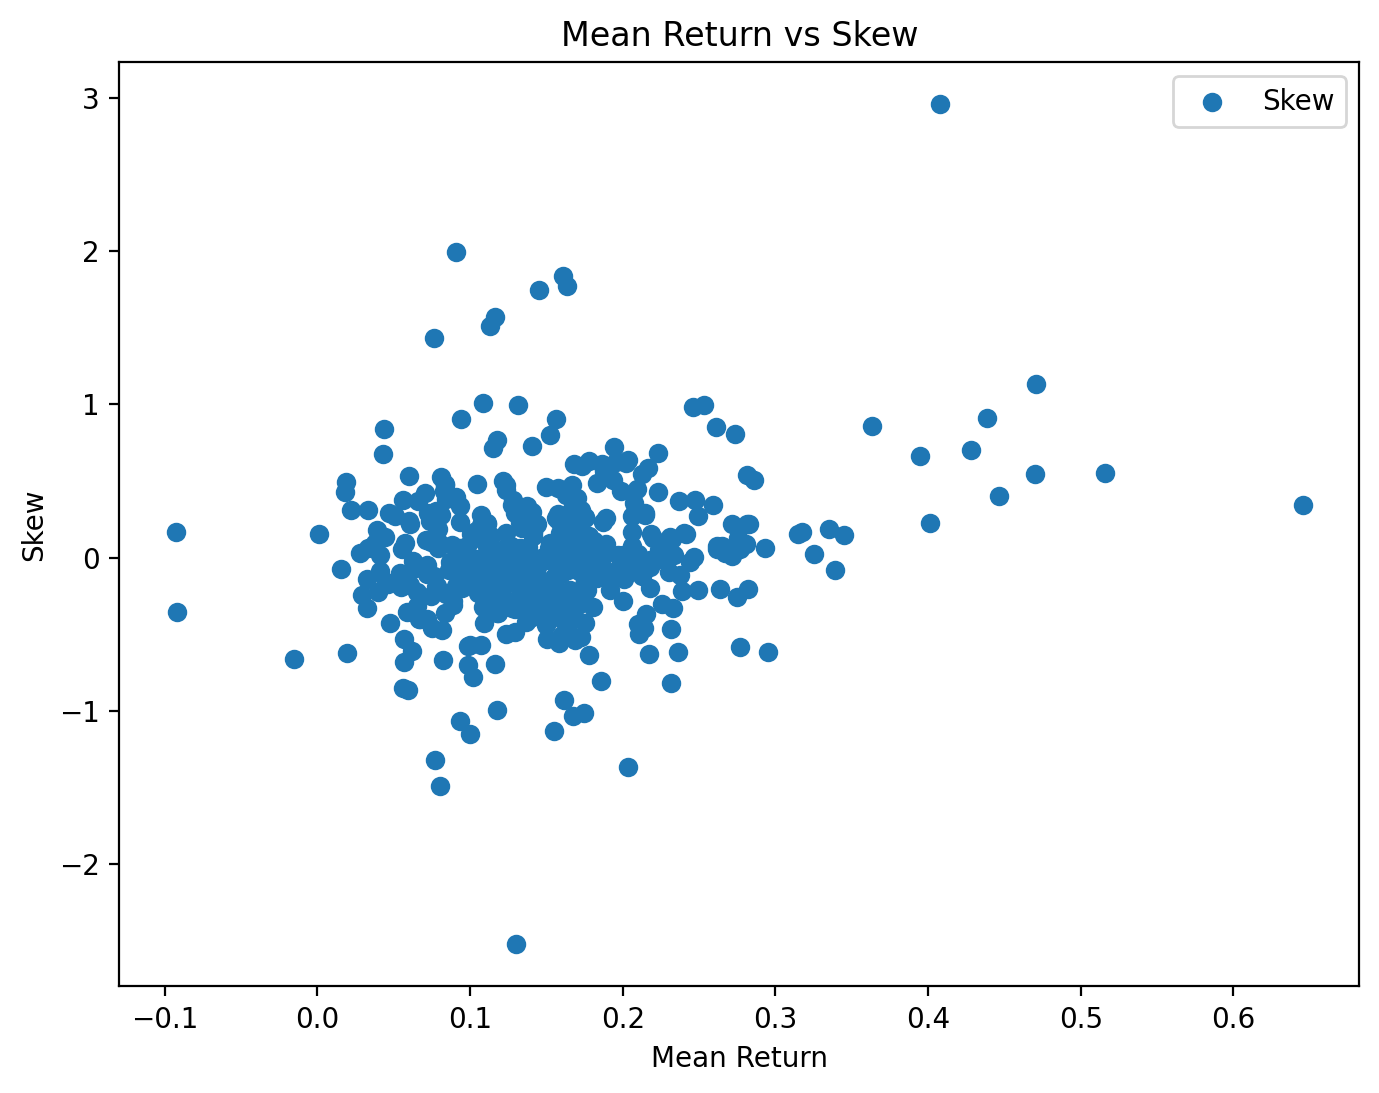

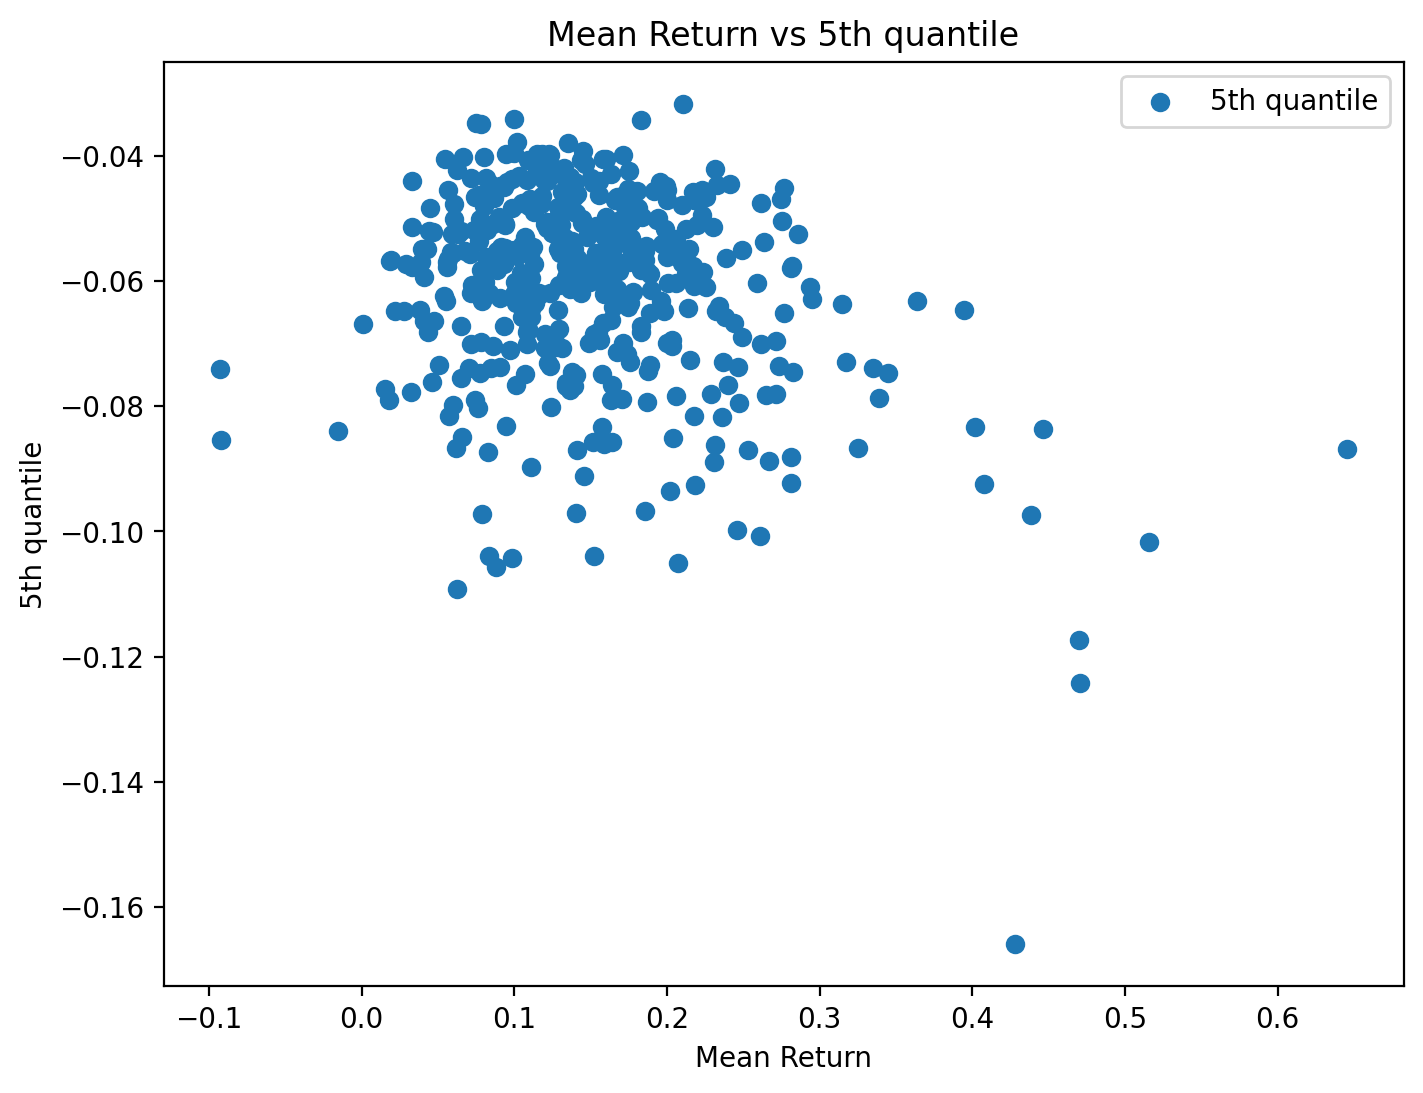

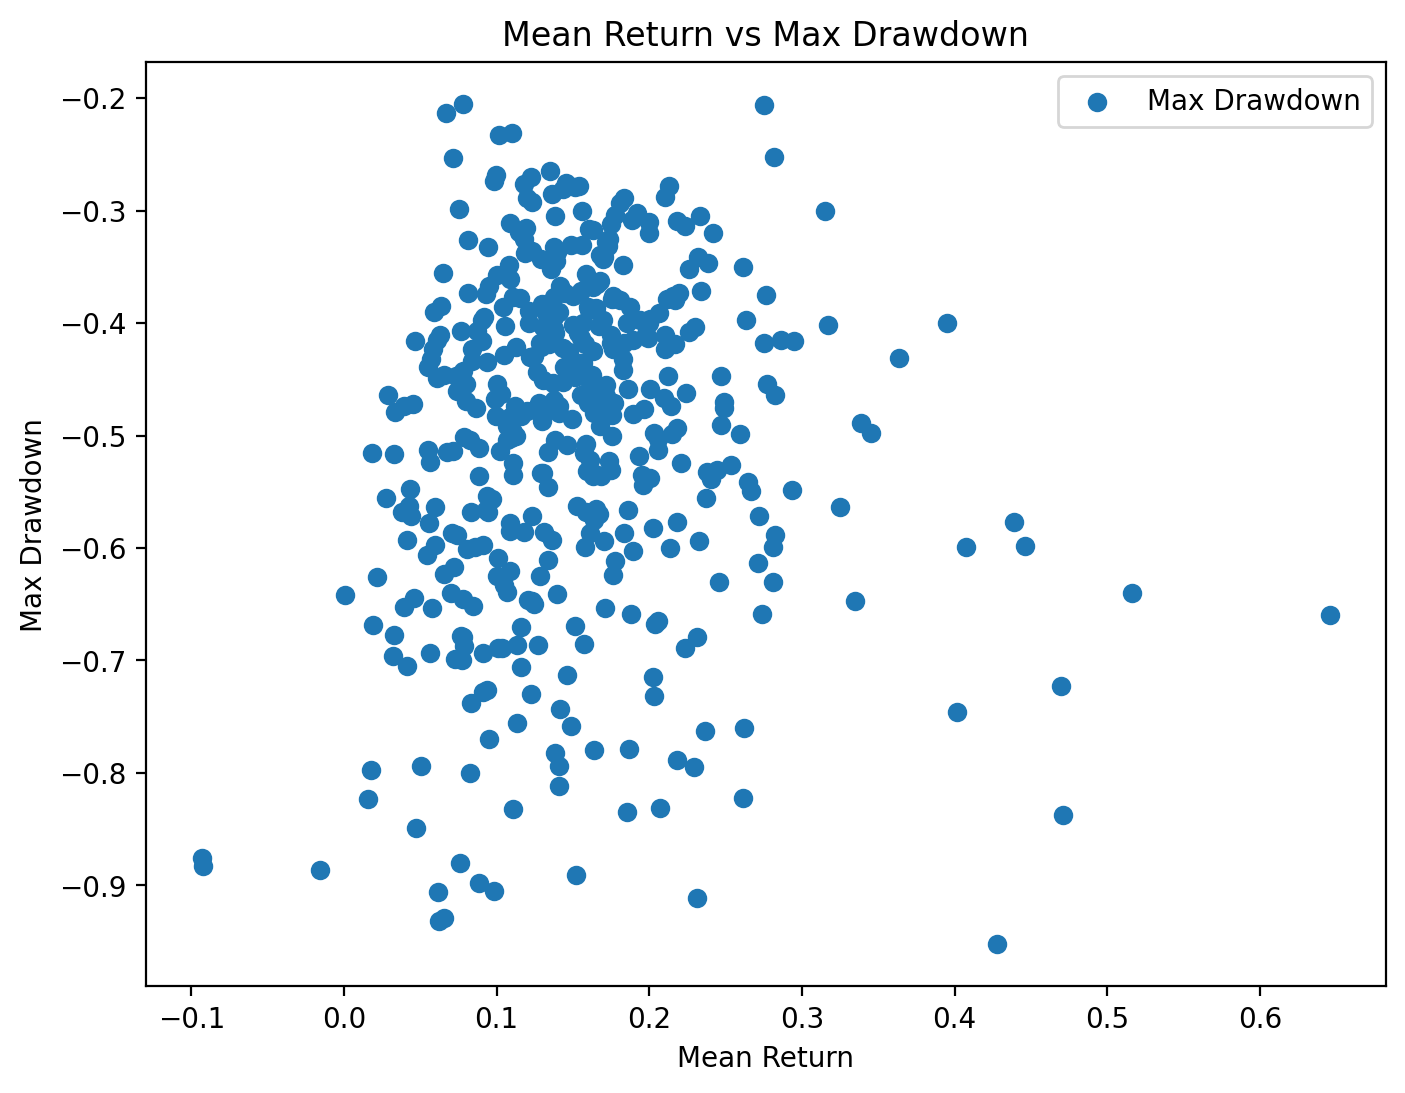

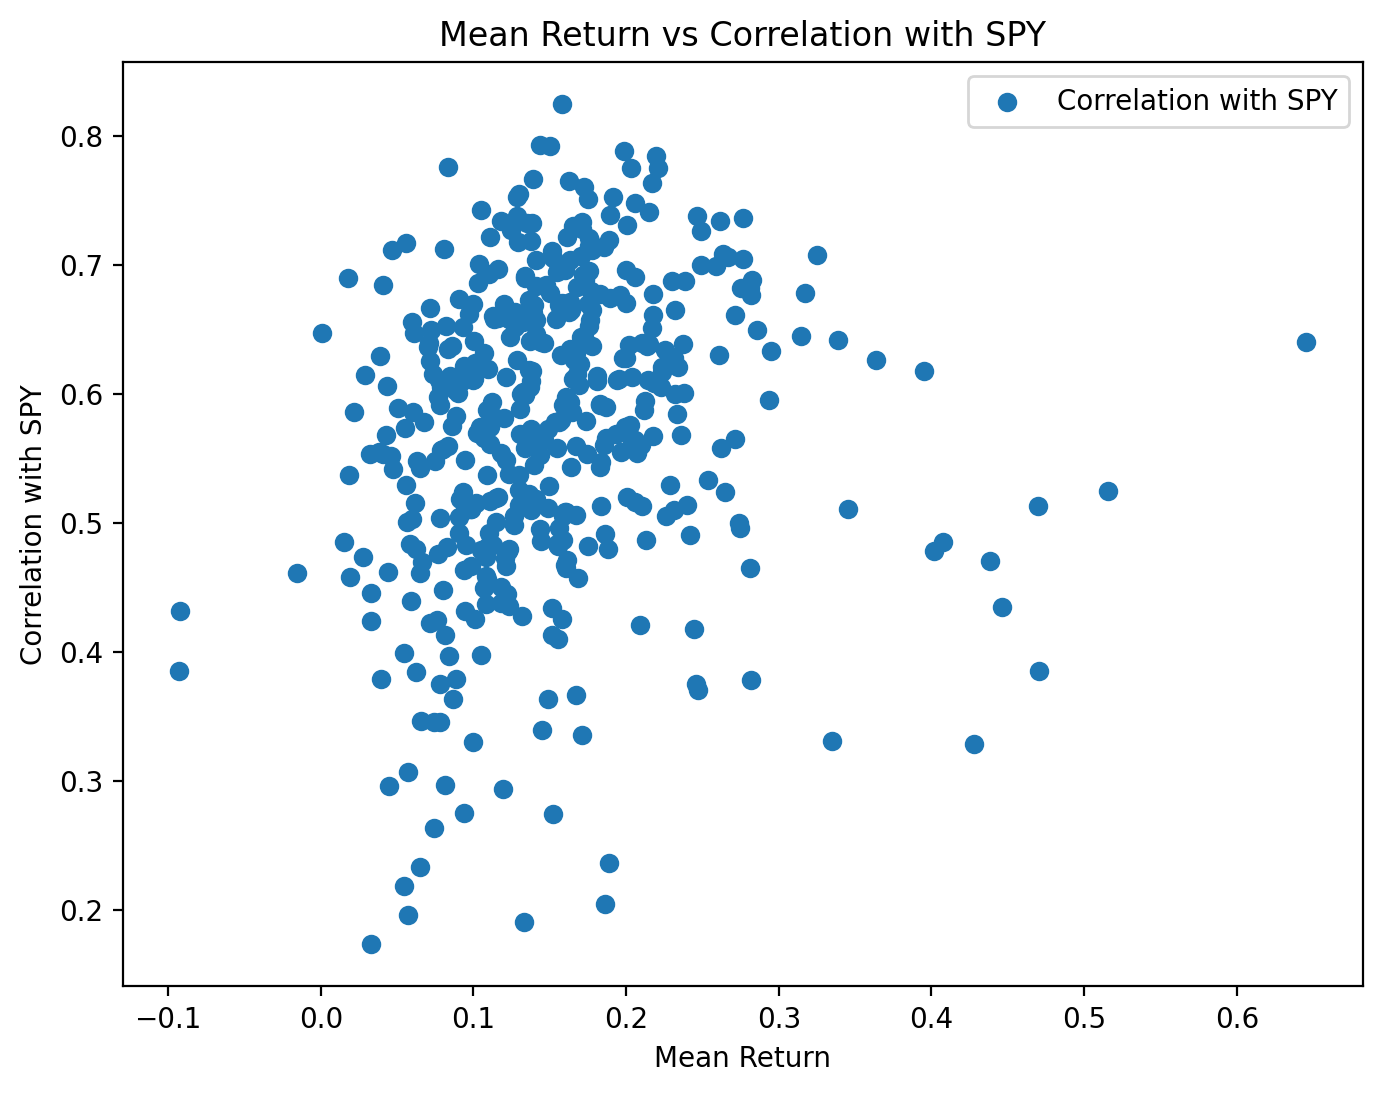

In [ ]:
x = summary["Mean Return"]
y = summary.drop(columns = ["Mean Return"])

for t in y.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(x, y[t], label = t)
    plt.xlabel("Mean Return")
    plt.ylabel(t)
    plt.title(f"Mean Return vs {t}")
    plt.legend()
    plt.show()